# Housing Prices Predictor

This project aims to predict housing prices in California using machine learning techniques. It involves exploring and preprocessing the data, engineering new features, training linear regression and random forest regression models, and evaluating their performance.


This project showcases data analysis and visualization skills using Python and key data science libraries including Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn. It is important to note that the project's aim is not to provide an exhaustive analysis of housing prices or offer financial advice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and exploring the dataset:

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


### Initial preprocessing:

In [4]:
data.info() # Over 200 null values revealed for total_bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True) # Removing the total_bedroom null values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


### Splitting the data into training and testing sets:

This section splits the dataset into training and testing sets using the 'train_test_split' function from scikit-learn.

The feature matrix and target variable array are created. The feature matrix contains all the columns except for the target variable. The target variable represents the values we want to predict or model.



In [7]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1) # Creates the feature matrix
y = data['median_house_value'] # Creates the target variable array

The feature matrix x and the target variable array y are split into training and testing sets. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. 20% of the data will be allocated to the testing set, while the remaining 80% will be used for training.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #Splits the sets and specifies test size

### Vizualize the training data:

The training data is concatenated ('join') with the target variable to create a new DataFrame called 'train_data'.
Histograms (hist) are plotted to visualize the distribution of the features in the training data.
A correlation matrix is computed using the 'corr' method, and a heatmap is created using the 'heatmap' function from Seaborn to visualize the correlations between features.

In [9]:
train_data = x_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20258,-119.17,34.20,36,2028,523.0,2751,496,3.0150,NEAR OCEAN,149300
2974,-119.10,35.33,4,6640,898.0,3121,902,6.7590,INLAND,170300
10304,-117.78,33.87,16,5609,952.0,2624,934,5.3307,<1H OCEAN,169600
14512,-117.16,32.91,5,1619,272.0,1063,296,6.0891,<1H OCEAN,214600
10971,-117.86,33.76,34,3153,561.0,1679,532,4.7083,<1H OCEAN,205300
...,...,...,...,...,...,...,...,...,...,...
12906,-121.34,38.61,20,5801,1148.0,2586,1063,3.9063,INLAND,162100
7800,-118.09,33.90,37,1147,258.0,742,242,4.0461,<1H OCEAN,153500
8800,-118.38,33.77,21,11353,1537.0,4649,1504,9.8210,NEAR OCEAN,500001
7321,-118.18,33.99,38,1010,315.0,1157,301,1.6341,<1H OCEAN,161800


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

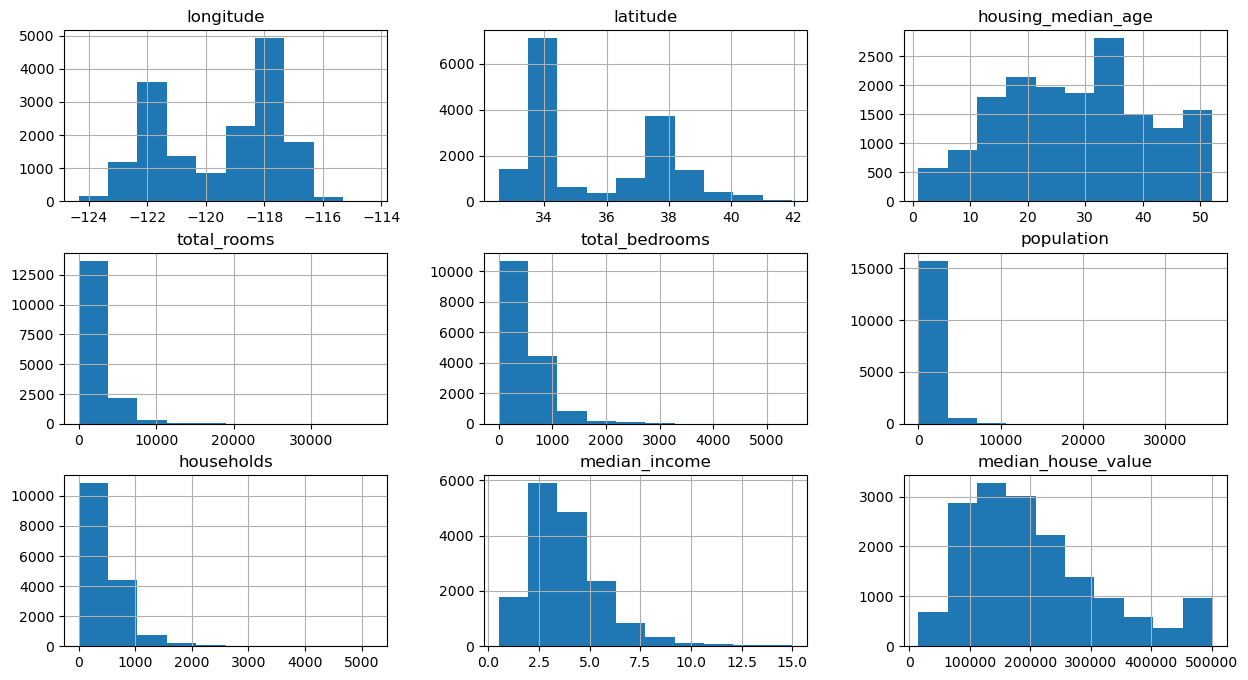

In [11]:
train_data.hist(figsize=(15,8))

In [12]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924719,-0.113970,0.055741,0.077901,0.109797,0.065616,-0.009524,-0.039410
latitude,-0.924719,1.000000,0.013865,-0.044086,-0.072787,-0.116424,-0.078944,-0.084215,-0.148351
housing_median_age,-0.113970,0.013865,1.000000,-0.366616,-0.325998,-0.299777,-0.306508,-0.119060,0.104927
total_rooms,0.055741,-0.044086,-0.366616,1.000000,0.929893,0.854441,0.918086,0.198159,0.134970
total_bedrooms,0.077901,-0.072787,-0.325998,0.929893,1.000000,0.874487,0.979001,-0.008055,0.050984
population,0.109797,-0.116424,-0.299777,0.854441,0.874487,1.000000,0.904608,0.005352,-0.023354
households,0.065616,-0.078944,-0.306508,0.918086,0.979001,0.904608,1.000000,0.013099,0.066744
median_income,-0.009524,-0.084215,-0.119060,0.198159,-0.008055,0.005352,0.013099,1.000000,0.688073
median_house_value,-0.039410,-0.148351,0.104927,0.134970,0.050984,-0.023354,0.066744,0.688073,1.000000


<Axes: >

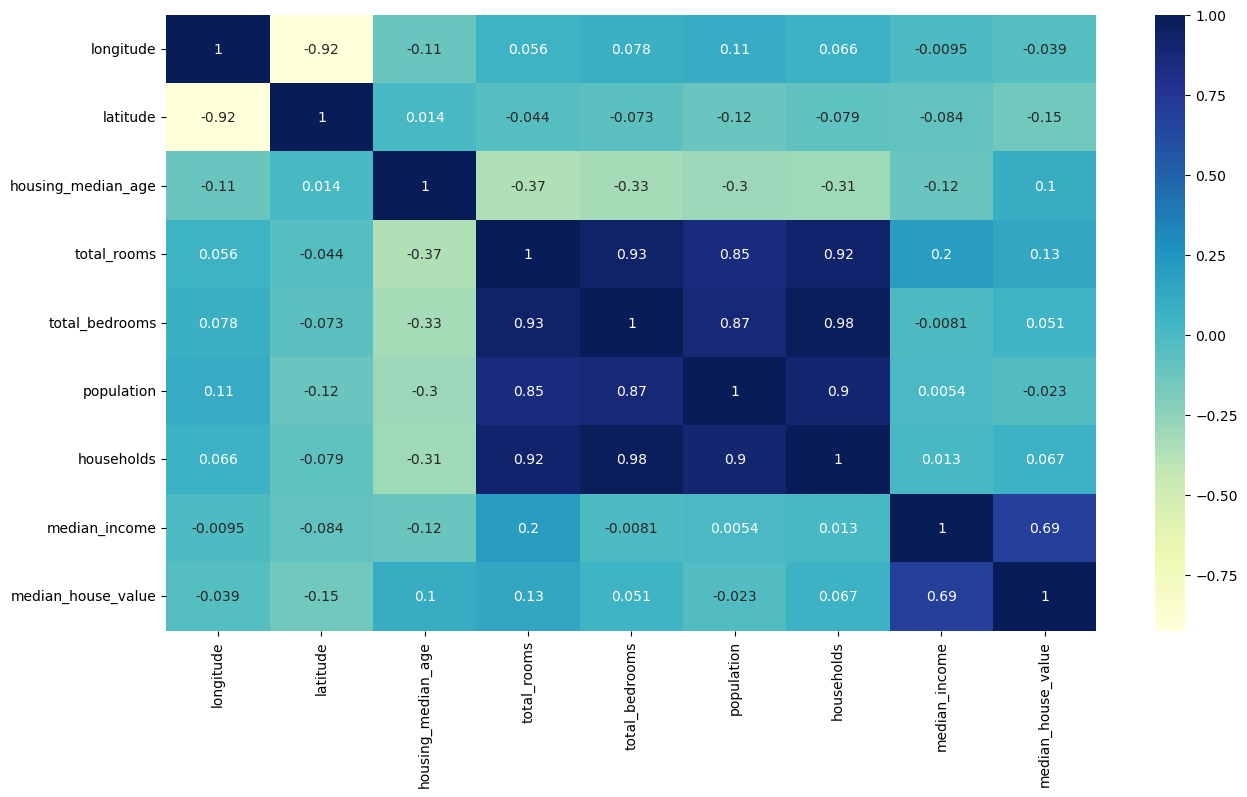

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

### Data transformation:

The numerical columns in the 'train_data' DataFrame are transformed using the natural logarithm. This transformation can help normalize skewed data and make it more suitable for certain statistical analyses.

In [14]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>]], dtype=object)

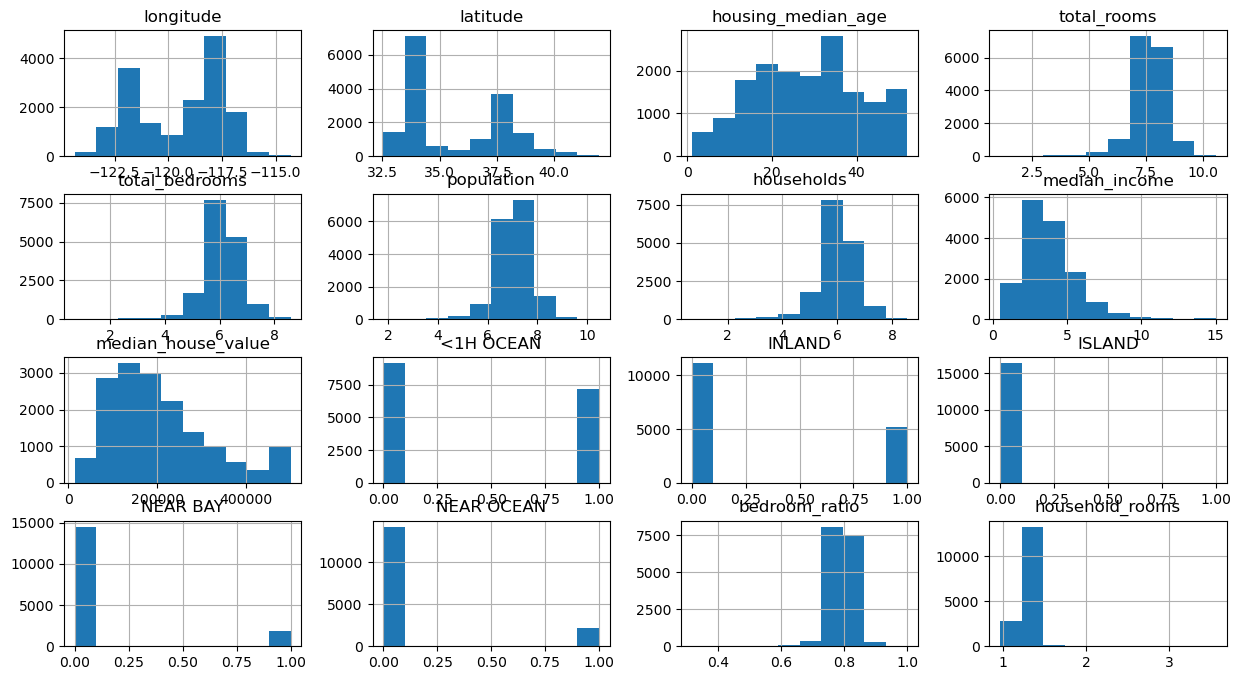

In [32]:
train_data.hist(figsize=(15,8)) # More like Gaussian bell curve

### One-hot encoding categorical variables:

The categorical variable 'ocean_proximity' is converted into dummy variables using one-hot encoding. The 'get_dummies()' function from pandas is used to create a new DataFrame with dummy variables for each unique value of 'ocean_proximity'. The original 'ocean_proximity' column is then dropped from the DataFrame.

In [16]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20258,-119.17,34.20,36,7.615298,6.261492,7.920083,6.208590,3.0150,149300,0,0,0,0,1
2974,-119.10,35.33,4,8.801018,6.801283,8.046229,6.805723,6.7590,170300,0,1,0,0,0
10304,-117.78,33.87,16,8.632306,6.859615,7.872836,6.840547,5.3307,169600,1,0,0,0,0
14512,-117.16,32.91,5,7.390181,5.609472,6.969791,5.693732,6.0891,214600,1,0,0,0,0
10971,-117.86,33.76,34,8.056427,6.331502,7.426549,6.278521,4.7083,205300,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12906,-121.34,38.61,20,8.665958,7.046647,7.858254,6.969791,3.9063,162100,0,1,0,0,0
7800,-118.09,33.90,37,7.045777,5.556828,6.610696,5.493061,4.0461,153500,1,0,0,0,0
8800,-118.38,33.77,21,9.337325,7.338238,8.444622,7.316548,9.8210,500001,0,0,0,0,1
7321,-118.18,33.99,38,6.918695,5.755742,7.054450,5.710427,1.6341,161800,1,0,0,0,0


A correalation heatmap that includes the new 'ocean_proximity' dummy variables is created.

<Axes: >

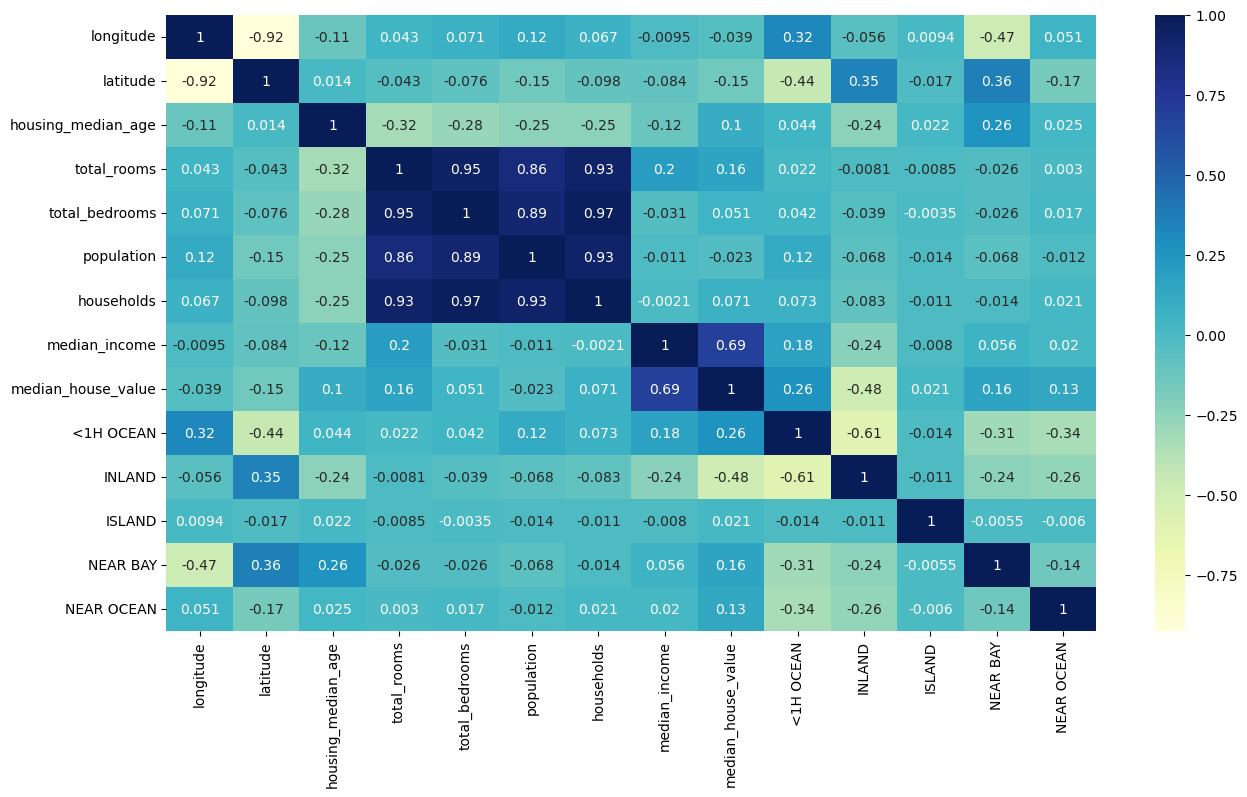

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

### Visualizing geographical data:

A scatter plot is created to visualize the geographical distribution of houses. The latitude and longitude coordinates are plotted on the x and y axes, respectively. The color of each point represents the median house value, providing insights into the relationship between location and housing prices.

<Axes: xlabel='latitude', ylabel='longitude'>

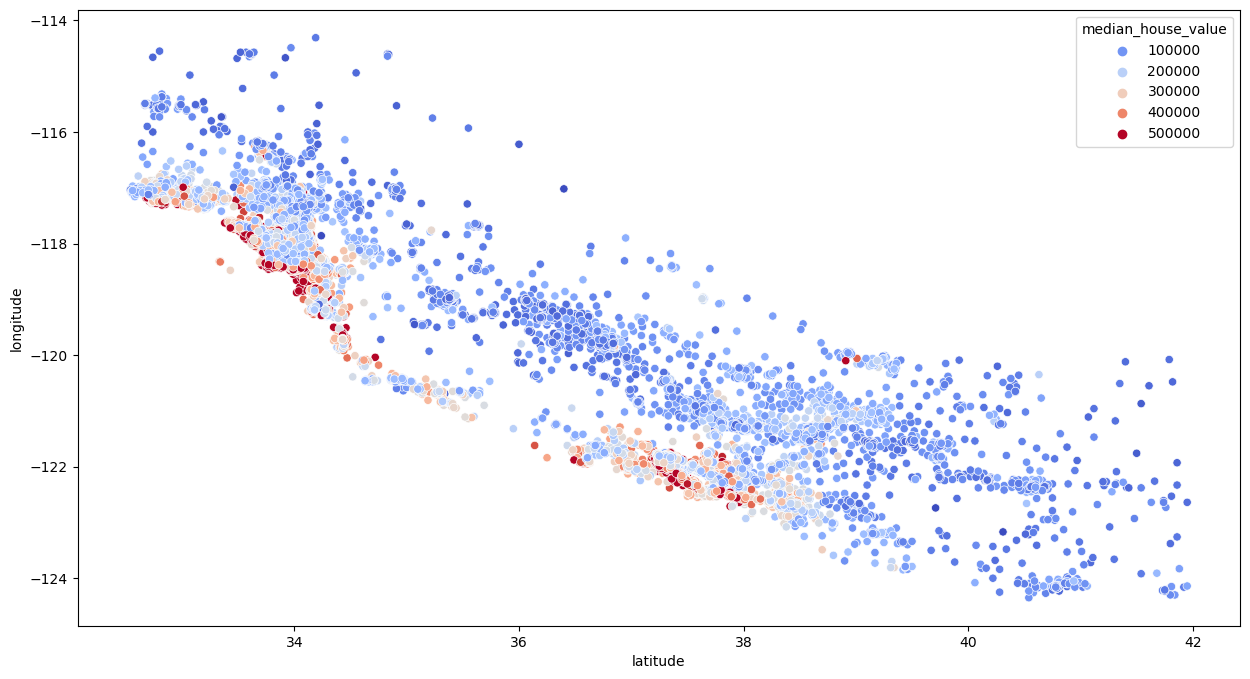

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

### Feature engineering:

Two new features, 'bedroom_ratio' and 'household_rooms', are created based on existing columns in the 'train_data' DataFrame. These features capture the ratio of bedrooms to total rooms and the average number of rooms per household, respectively.

In [20]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

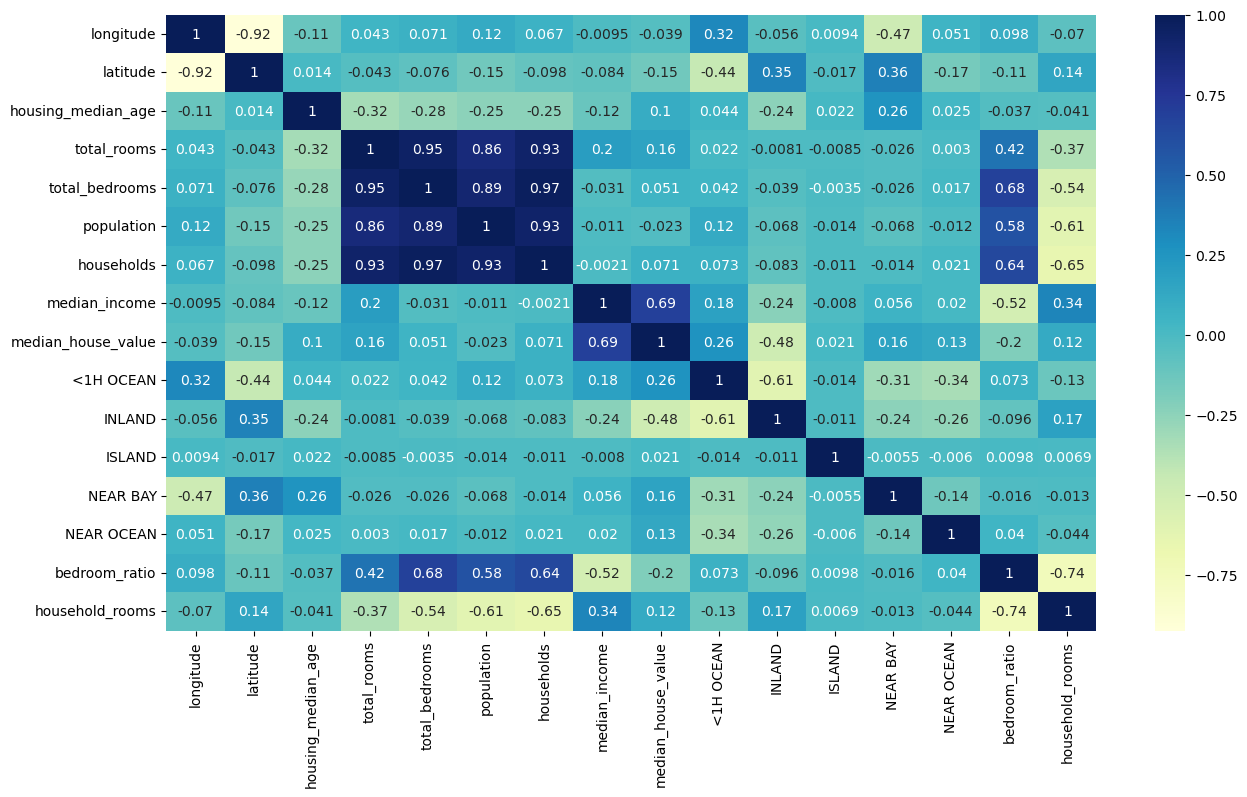

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

### Data scaling and modeling:

The feature columns in the training data are scaled using the 'StandardScaler()' from scikit-learn to normalize their values. The scaled data is then used to train a linear regression model using the 'LinearRegression()' class. The 'fit()' method is called to fit the model to the training data.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

### Preparing the testing data

Similar preprocessing steps are applied to the testing data as done with the training data. The testing data is transformed and encoded, and the additional features are created.

In [23]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [24]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

### Evaluating the linear regression model:

The testing data is scaled using the same scaler object used for the training data. The trained linear regression model is then used to predict the target variable for the scaled testing data, and the score is calculated to evaluate the model's performance.

In [25]:
x_test_s = scaler.transform(x_test)

In [26]:
reg.score(x_test_s, y_test)

0.6890561812942366

### Training a Random Forest Regressor:

A Random Forest Regressor is initialized and trained using the scaled training data ('x_train_s' and 'y_train').

In [33]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

### Evaluating the Random Forest Regressor:

The trained Random Forest Regressor is used to predict the target variable for the scaled testing data ('x_test_s'), and the score is calculated to evaluate the model's performance.

In [28]:
forest.score(x_test_s, y_test)

0.8159974270949201

### Hyperparameter tuning using GridSearchCV:

A parameter grid is defined with different values for hyperparameters such as the number of estimators, minimum samples split, and maximum depth. GridSearchCV is used to perform a grid search with 5-fold cross-validation to find the best combination of hyperparameters that minimize the negative mean squared error. The best estimator is selected based on the results of the grid search.

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split":[2, 4,],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

### Best estimator and evaluation:

The best estimator found by GridSearchCV is displayed, and its score is calculated using the scaled testing data ('x_test_s') to evaluate the model's performance.

In [30]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [31]:
grid_search.best_estimator_.score(x_test_s, y_test)

0.8174526576830817

## Conclusion

The project demonstrates the process of predicting housing prices using machine learning techniques. By engineering new features and training different models, we can improve the accuracy of the predictions. The linear regression and random forest regression models provide insights into the relationships between the features and the target variable. Hyperparameter tuning further enhances the performance of the random forest model.
